# Lab 2
**Student: Nguyen Mai Dinh, Le (Demi, Le)**

**ID: 300312139**

## Question 1: Training error VS. sample size – 10%

Mean Squared Error (MSE) represents the sum of squared differences between actual data points in the dataset and the corresponding predicted data points from the model. As the polynomial degree of a regression model increases, the risk of overfitting also increases, since the model becomes more tailored to individual data points in the training set. This can be observed in how MSE decreases when moving from a linear model (degree 1) to a quadratic model (degree 2). **At very high degrees (e.g., 10 or 25), MSE reaches zero, indicating that the model perfectly fits the training data and suffers from overfitting**.

However, **when the size of the training set increases, the same model will no longer fit the newly added data perfectly, causing MSE to rise**. At a certain point, if the model has good generalization ability (i.e., it can predict real-world values effectively), MSE will stabilize around a certain value. Conversely, if the model lacks generalization, MSE will continue to increase. This is evident in models (c) and (d), where **MSE stops increasing and levels off, indicating that the model generalizes well**.

This trend also holds when evaluating the model on a test dataset. Initially, MSE is high, especially for higher-degree models, due to overfitting. However, as the test set size increases, the MSE of both the training and test sets converges toward a stable value, confirming the model's ability to generalize.

## Question 2: Training VS. Test Error – 15%

**1. Suppose we perform unregularized regression on a dataset. Is the validation error always higher than the training error?** 

**No.**

When training an unregularized model, the initial step uses the training set without applying any penalty. The model aims to minimize the MSE to reduce error on the training data, with a lower MSE indicating a better fit to the individual data points. 

However, when tested on the validation set, the MSE is *typically higher* because the model has not been specifically optimized for it, leading to less accurate predictions. The purpose of the validation set is to tune hyperparameters. After tuning, the model is adjusted to improve performance on both the training and validation sets.

*However, in some cases, if the model is not overfitting, the MSE on both sets may be similar. Therefore, while the MSE on the validation set is usually higher, it is not always the case.*

**2. Suppose we perform unregularized regression on a dataset. Is the training error with a degree 10 polynomial always lower than or equal to that using a degree 9 polynomial?** 

**Yes.**

A model with a higher degree (such as degree 10) may fit the training data better, reducing error on the training set because it captures more nuances of the data points. Therefore, the degree 10 model will fit the individual data points better than the degree 9 model, resulting in *lower error for the degree 10 model compared to the degree 9 model* because there is less difference between the actual and predicted values.

**3. Suppose we perform both regularized and unregularized regression on a dataset. Is the testing error with a degree 20 polynomial always lower using regularized regression compared to unregularized regression?**

**No.**

The goal of regularization is to add a penalty to the loss function to prevent feature weights from becoming too large, which helps reduce overfitting. When applying regularized regression to a high-degree model (e.g., degree 20 as in this case), the MSE of the unregularized model will be very low because the high-degree polynomial is sensitive to individual data points, leading to overfitting.

With regularized regression, the penalty added to the loss function causes *the MSE of the regularized model to be higher than the unregularized model*. However, this helps reduce overfitting and improves the model's generalization, making it perform better on unseen data (testing set).

## Question 3: Closed-form Solution & Gradient Decent – 15%

A. Sequential Learning

Yes. Gradient descent can be used for this regression problem as it doesn't rely on the invertibility of the matrix X^T*X. Gradient descent is iterative, so it can handle cases where X^T*X might not be invertible or if the dataset is large or complex. Since no specific issues like multicollinearity or too many features are mentioned, gradient descent should work fine here.

B. Closed-form solution (Least Squares)

Yes. The closed-form solution (Normal Equation) can be used for this regression problem as long as X^T*X is invertible. In this case, we would need to ensure that there is no multicollinearity. Given the matrix dimensions and no issues with feature correlation, the Normal Equation can compute the solution as long as the matrix X^T*X is invertible. **If X^T*X is singular or near-singular, the closed-form solution would not work**


## Part 4 Regression with Scikit-Learn – 50%

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(data_id=43465)
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df[boston.target_names[0]] = boston.target

In [491]:
#Check dataframe
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [492]:
#Normalize the z-score for all columns because some columns show signs of having different units and are not on the same scale.
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


## Task 1: Data Splitting Strategies – 15%

### Task 1.a.

**a.2. What are the common splitting methods? Why use them?**

There are several data splitting methods for a Machine Learning project:

1. *Train-Test Split* (e.g., 70:30, 80:20): The dataset is divided into 7 or 8 parts for training the model (training set) and the remaining parts for evaluating the model's performance (test set).

* Pros: Simple, easy to implement, low resource requirements.
* Cons: If the dataset is small, it can be difficult to split and might introduce bias, leading to incorrect performance evaluation.

2. *Train-Validation-Test Split* (e.g., 70:15:15, 60:20:20): The dataset is divided into 6 or 7 parts for training the model (training set), and the remaining part is split into two halves: one for tuning the model’s hyperparameters (validation set) and one for final performance evaluation (test set).

* Pros: Helps tune the model and reduces overfitting through the validation set.
* Cons: If the dataset is small, there may not be enough data left for both the validation and test sets to be representative.

3. *K-Fold Cross Validation*: The dataset is divided into k parts, and each time, k-1 folds are used for training, while the remaining fold is used for testing. This process is repeated k times, ensuring that each sample is tested exactly once.

* Pros: Maximizes data usage, reduces bias when the dataset is small, and allows for model validation without the need for a separate validation set.
* Cons: Time-consuming and resource-intensive. It may still introduce bias if there is an uneven distribution of labels.

4. *Stratified Sampling*: Similar to K-Fold Cross Validation, but the splitting ratio is based on the label distribution in the dataset.

* Pros: Useful for imbalanced datasets (e.g., cancer patients vs non-cancer patients), providing more accurate evaluation.
* Cons: Time-consuming and resource-intensive. Only applicable when the dataset has labeled classes.

5. *Time-Based Split*: The dataset is divided into training and testing sets (e.g., 70:30, 80:20), but based on chronological order.

* Pros: Suitable for time-series data, reflecting real-world scenarios where time is a factor.
* Cons: If external factors affect specific periods (e.g., Covid-19 altering consumption trends), the model might not generalize well to future predictions.

**a.1. How should you split it to train a model?**

Based on the analysis above, I would choose the *K-Fold Cross Validation* method for this dataset, as the data is relatively small (around 500 rows) to avoid potential bias and help stabilize the model's performance.

### Task 1.b:

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

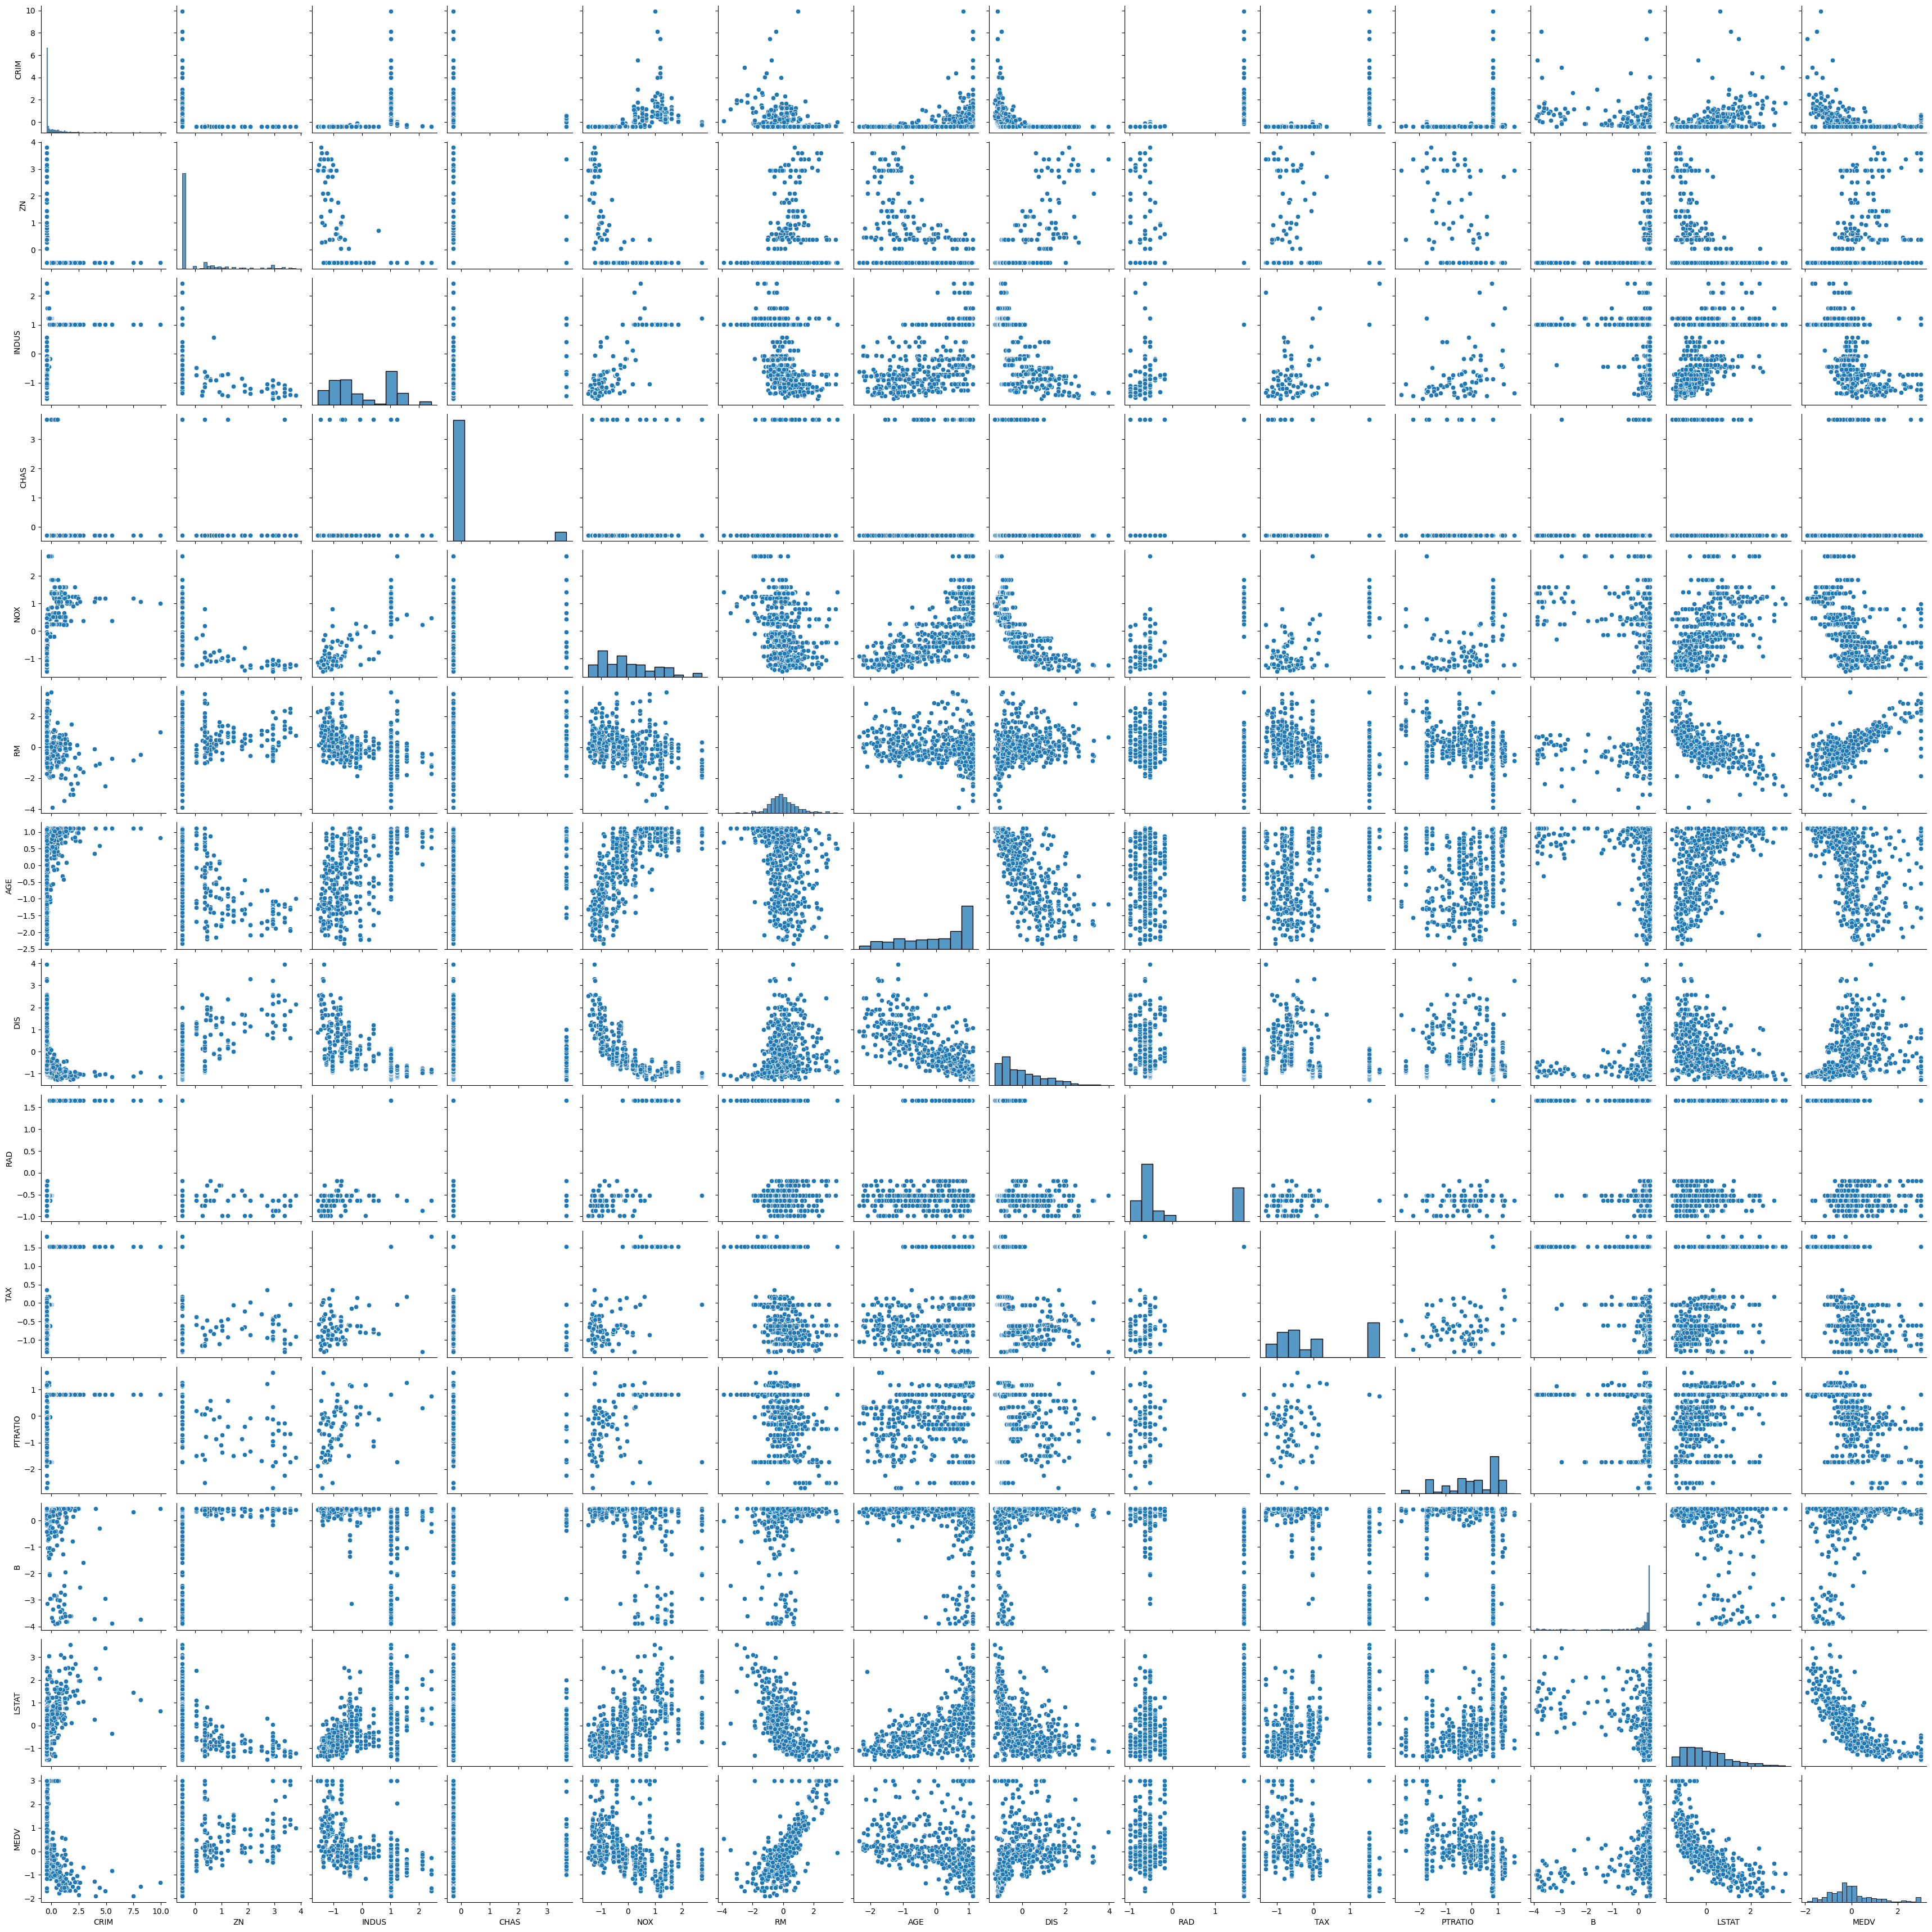

In [463]:
#Plotting the relationship between features using a Pairplot to initially detect correlations
sns.pairplot(df)
plt.show()

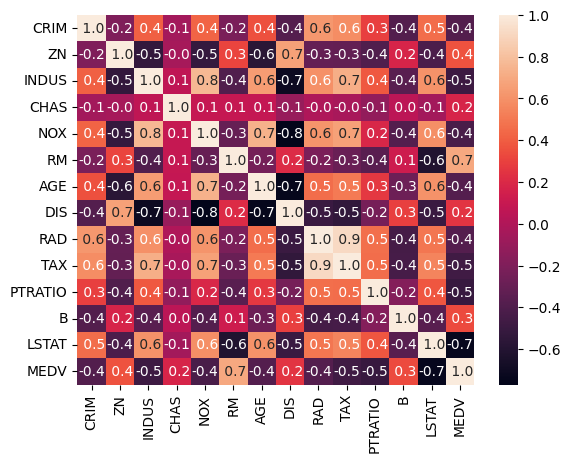

In [464]:
#Plotting a heatmap with correlation coefficients to check the degree of correlation between features.
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=" .1f")
plt.show()

**Given the dataset size (506 rows) and number of features, K-Fold Cross Validation is chosen for training and validation to ensure accuracy and stability. The model will then be evaluated using performance metrics and visualized to show the error between the test and predicted sets.**

In [467]:
# Initializing KFold with 5 splits and shuffling the data before splitting
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle=True)

In [468]:
# Splitting the dataset into training and testing sets, with 30% for testing
from sklearn.model_selection import train_test_split
x = df.drop(columns=['MEDV'], axis=1)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Task 2: Model Implementation & Scikit-Learn Design – 20%

### Task 2.a: Answer in your own words

1. Linear Regression and Ridge Regression in scikit-learn do not use gradient descent. Instead, they rely on the normal equation to solve the regression problem.
2. Since these models are solved using closed-form solutions, hyperparameters like learning rate, epochs, or batch size can’t be adjusted directly. However, you can use k-fold cross-validation to create mini-batches manually. While you can simulate epochs with a loop, it’s unnecessary as these models compute results in a single pass. Similarly, adjusting learning rate is not applicable.
3. 
   * Pros: These models are stable and accurate, eliminating the need for subjective hyperparameter tuning.
   * Cons: They are resource-intensive and slow when working with large, complex, or high-dimensional datasets.
4. LinearRegression & Ridge use closed-form solutions (normal equations), solving regression in one step. They don’t require hyperparameters like learning rate, epochs, or batch size. While iterative behavior can be mimicked (e.g., k-fold cross-validation), it’s unnecessary.
   * Pros: Stable, accurate, and no need for hyperparameter tuning
   * Cons: Computationally expensive for large, complex, or high-dimensional datasets.

   SGDRegressor uses iterative gradient descent, making it better suited for large, complex datasets. It allows easier updates for regularization and scales efficiently.
   * Pros: Handles large datasets well and supports flexible regularization.
   * Cons: Requires tuning and can take longer to converge.

For small datasets, closed-form methods are best. For large or high-dimensional datasets, SGDRegressor is more practical and resource-efficient.

### Task 2.b: Train your Linear Regression, Ridge Regression and SGDRegression models using scikit-learn in code.

In [471]:
from sklearn.model_selection import cross_validate

#Function for cross validation testing for different models
def cross_test(model):
    # Cross-validation
    cross_val = cross_validate(estimator=model, X=x, y=y, cv=kfold, return_estimator=True, 
                               scoring=['neg_root_mean_squared_error', 'r2'], return_train_score=True)
    
    # Extract scores from the cross-validation results
    test_rmse_scores = -cross_val['test_neg_root_mean_squared_error']
    test_r2_scores = cross_val['test_r2']
    train_rmse_scores = -cross_val['train_neg_root_mean_squared_error']
    train_r2_scores = cross_val['train_r2']
    
    # Prepare the list of results
    result_list = []
    for i, model_ in enumerate(cross_val['estimator']):
        result_list.append({
            'fold': i+1, 
            'coefficients': model_.coef_, 
            'intercept': model_.intercept_,
            #Performance metrics: Test vs train RMSE, Test vs train R-squared
            'Test RMSE': test_rmse_scores[i],
            'Train RMSE': train_rmse_scores[i],
            'Test R²': test_r2_scores[i],
            'Train R²': train_r2_scores[i],
            'Average Test RMSE': test_rmse_scores.mean(),
            'Average Test R²': test_r2_scores.mean()
        })
    
    # Convert the result list to a DataFrame for better readability
    result_df = pd.DataFrame(result_list)
    return result_df, cross_val

#Function for retrieving model with the lowest RMSE -> best fit model
def best_coef(df, test_rmse_scores, cross_val):
   # Find the best model based on the lowest RMSE on the test set
    best_model_index = np.argmin(test_rmse_scores)
    
    # Get the row for the best model (corresponding to best_model_index)
    best_model_row = df.iloc[best_model_index]
    
    # Return coefficients and intercept for the best model
    best_coefficients = best_model_row['coefficients']
    intercept = best_model_row['intercept']

    feature_names = cross_val['estimator'][0].feature_names_in_
    
    # Add the intercept (constant) to the DataFrame
    coef_df = pd.DataFrame({
        'Coefficient': feature_names,
        'Value': best_coefficients
    })

    best_model = cross_val['estimator'][best_model_index]
    
    return coef_df, intercept, best_model_index, cross_val, best_model

#Function for plotting predicted y from model vs. tested y
def plotting(model):
    y_predict = model.predict(X_test)
    error = y_test - y_predict

    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_test, label='y_test', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(y_predict, label='y_predict', color='red', fill=True, alpha=0.5)
    sns.kdeplot(error, label='loss', color='green', fill=True, alpha=0.5)
    plt.title('Comparison of y_test and y_predict', fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()

In [483]:
from sklearn.linear_model import LinearRegression

#Build Linear Regression Model
linearModel = LinearRegression()
linear_result_df, linear_cross_val = cross_test(linearModel)
linear_coef_df, linear_intercept, linear_best_model_index, linear_cross_val, linear_best_model = best_coef(linear_result_df, linear_result_df['Test RMSE'].values, linear_cross_val)

print("Best model: ")
print(linear_coef_df)
print("Intercept: ", linear_intercept)
linear_result_df

Best model: 
   Coefficient     Value
0         CRIM -1.212761
1           ZN  1.225287
2        INDUS  0.119247
3         CHAS  0.708352
4          NOX -2.290540
5           RM  2.673171
6          AGE  0.197592
7          DIS -3.315711
8          RAD  3.152410
9          TAX -2.228707
10     PTRATIO -2.218854
11           B  0.847174
12       LSTAT -3.978542
Intercept:  22.66896176545345


,fold,coefficients,intercept,Test RMSE,Train RMSE,Test R²,Train R²,Average Test RMSE,Average Test R²
0,1,"[-0.9648105679702464, 1.0876904380934684, -0.2...",22.479728,6.138096,4.267982,0.652303,0.767579,4.787972,0.711007
1,2,"[-0.8655719209619614, 0.8924167707313795, 0.02...",22.507978,5.274214,4.543236,0.652783,0.758554,4.787972,0.711007
2,3,"[-0.9024936434464386, 1.2735862206093014, 0.35...",22.480133,4.404919,4.759059,0.770044,0.731524,4.787972,0.711007
3,4,"[-1.212760764639439, 1.2252865570836438, 0.119...",22.668962,3.676650,4.923128,0.671114,0.743130,4.787972,0.711007
4,5,"[-0.675724781794798, 0.865947502213803, 0.5420...",22.487642,4.445983,4.772507,0.808790,0.712495,4.787972,0.711007


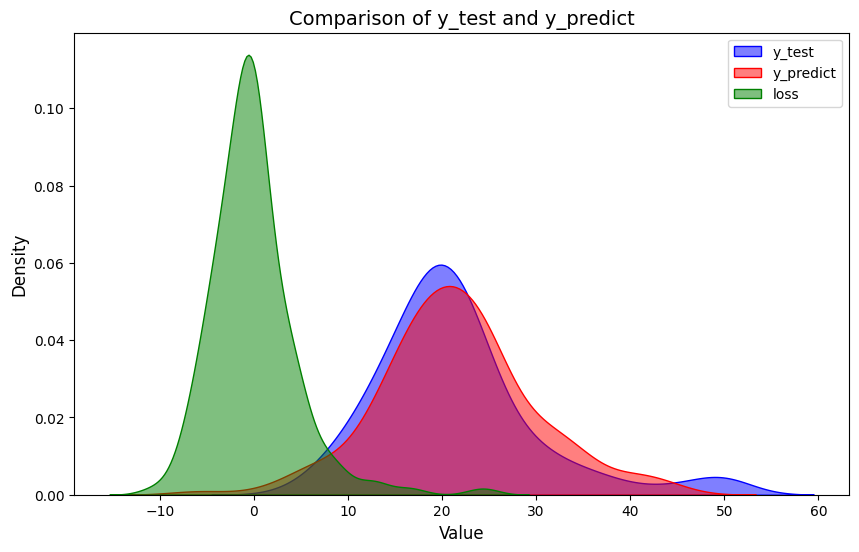

In [484]:
# Plot actual vs predicted values
plotting(linear_best_model)

In [485]:
from sklearn.linear_model import Ridge

# Build Ridge model with a given alpha
def ridge_model(alpha):
    return Ridge(alpha)

# Define a range of alpha values
alpha_range = np.arange(1, 11, 1)

# Initialize lists to store results and cross-validation data
all_results = []
all_cross_val = []

# Loop over the alpha values to train Ridge models
for i, alpha in enumerate(alpha_range):
    ridgeModel = ridge_model(alpha)
    
    # Cross-validation testing and model evaluation
    result_df, cross_val= cross_test(ridgeModel)
    
    result_df['Alpha'] = alpha
    all_results.append(result_df)
    all_cross_val.append(cross_val)

# Combine all results into a single dataframe
ridgeResult = pd.concat(all_results, ignore_index=True)
# Find the index of the best model
ridge_best_model_index = np.argmin(ridgeResult['Test RMSE'])
n_folds = len(all_cross_val[0]['estimator'])  #Number of models
alpha_index = ridge_best_model_index // n_folds  #Corresponsing alpha index of best model
fold_index = ridge_best_model_index % n_folds  # Corresponsing fold index of best model

# Retrieve the best model
ridge_best_model = all_cross_val[alpha_index]['estimator'][fold_index]
# Create a dataframe to store feature coefficients
ridge_coef_df = pd.DataFrame({
    'Coefficient': all_cross_val[alpha_index]['estimator'][0].feature_names_in_,  # Lấy tên các features
    'Value': ridge_best_model.coef_  # Lấy hệ số của mô hình
})
# Get the intercept
ridge_intercept = ridge_best_model.intercept_


print("Best model: ")
print(ridge_best_model)
print(ridge_coef_df)
print("Intercept: ", ridge_intercept)
ridgeResult

Best model: 
Ridge(alpha=np.int64(9))
   Coefficient     Value
0         CRIM -0.917666
1           ZN  0.928413
2        INDUS  0.036568
3         CHAS  0.844660
4          NOX -2.058707
5           RM  2.748710
6          AGE  0.177775
7          DIS -2.747717
8          RAD  2.334290
9          TAX -1.664682
10     PTRATIO -2.015205
11           B  0.891844
12       LSTAT -3.523597
Intercept:  22.685908738342317


,fold,coefficients,intercept,Test RMSE,Train RMSE,Test R²,Train R²,Average Test RMSE,Average Test R²,Alpha
0,1,"[-0.9028675074369497, 1.1072500335699071, 0.07...",22.559929,4.706832,4.681886,0.626219,0.757927,4.901617,0.701423,1
1,2,"[-0.9542203001156673, 1.16337053441285, -0.055...",22.718048,4.495429,4.765871,0.671564,0.746100,4.901617,0.701423,1
2,3,"[-1.2102361817574045, 1.078486706907006, 0.357...",22.365444,5.437380,4.514274,0.711651,0.743225,4.901617,0.701423,1
3,4,"[-0.33039779806479663, 0.9338869142826866, 0.0...",22.489465,4.741115,4.715789,0.754688,0.730695,4.901617,0.701423,1
4,5,"[-0.964334155976413, 0.9510884086588983, 0.290...",22.525848,5.127327,4.588605,0.742996,0.736294,4.901617,0.701423,1
5,1,"[-0.9920558629392575, 0.9774364338006453, -0.1...",22.472156,6.014510,4.332224,0.638273,0.766160,4.862350,0.710585,2
6,2,"[-0.893299643129015, 1.2957880322137028, 0.400...",22.528692,4.885801,4.644316,0.731406,0.740137,4.862350,0.710585,2
7,3,"[-0.7521143048233353, 0.9293376974773672, -0.1...",22.633870,4.611588,4.713885,0.731372,0.740389,4.862350,0.710585,2
8,4,"[-0.828391357735991, 0.8057990284654019, 0.189...",22.500100,4.713130,4.719580,0.645371,0.749826,4.862350,0.710585,2
9,5,"[-1.0002683144577507, 1.1919927561081383, 0.19...",22.462338,4.086722,4.845854,0.806503,0.720071,4.862350,0.710585,2


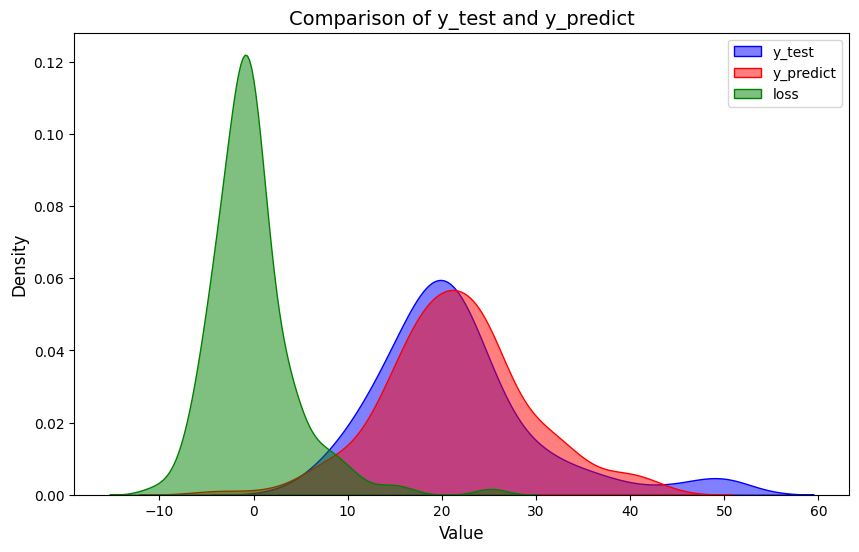

In [486]:
# Plot actual vs predicted values
plotting(ridge_best_model)

In [488]:
from sklearn.linear_model import SGDRegressor

# Build SGDRegressor model with specified hyperparameters
stochasticModel = SGDRegressor(
    alpha=0.0001, 
    eta0=0.01, 
    learning_rate='invscaling', 
    max_iter=1000)

# Perform cross-validation
sgd_result_df, sgd_cross_val = cross_test(stochasticModel)
# Retrieve the best coefficients, intercept, model index, and cross-validation data from the results
sgd_coef_df, sgd_intercept, sgd_best_model_index, sgd_cross_val, sgd_best_model = best_coef(sgd_result_df, sgd_result_df['Test RMSE'].values, sgd_cross_val)

print("Best model: ")
print(sgd_coef_df)
print("Intercept: ", sgd_intercept)
sgd_result_df

Best model: 
   Coefficient     Value
0         CRIM -0.879026
1           ZN  0.714327
2        INDUS -0.300062
3         CHAS  0.890377
4          NOX -2.104806
5           RM  2.494068
6          AGE -0.012870
7          DIS -2.879681
8          RAD  2.167010
9          TAX -1.212242
10     PTRATIO -2.159520
11           B  0.823170
12       LSTAT -3.827910
Intercept:  [22.59633795]


,fold,coefficients,intercept,Test RMSE,Train RMSE,Test R²,Train R²,Average Test RMSE,Average Test R²
0,1,"[-1.0669526245657603, 0.9739048113422317, -0.0...",[22.450523302273467],4.890337,4.646932,0.708173,0.746081,4.8779,0.710591
1,2,"[-0.20757088893113038, 0.8977567601790823, -0....",[22.711666648771327],4.518038,4.811315,0.729737,0.732386,4.8779,0.710591
2,3,"[-0.8790255955570803, 0.7143273858563639, -0.3...",[22.59633795245661],3.563949,4.943479,0.843085,0.713442,4.8779,0.710591
3,4,"[-0.8424918541938045, 1.0862224127050524, -0.1...",[22.654042980740353],4.554483,4.740261,0.686873,0.746485,4.8779,0.710591
4,5,"[-0.8860637101456398, 0.8649928055487072, -0.0...",[22.258925496195534],6.862691,4.114257,0.585086,0.778429,4.8779,0.710591


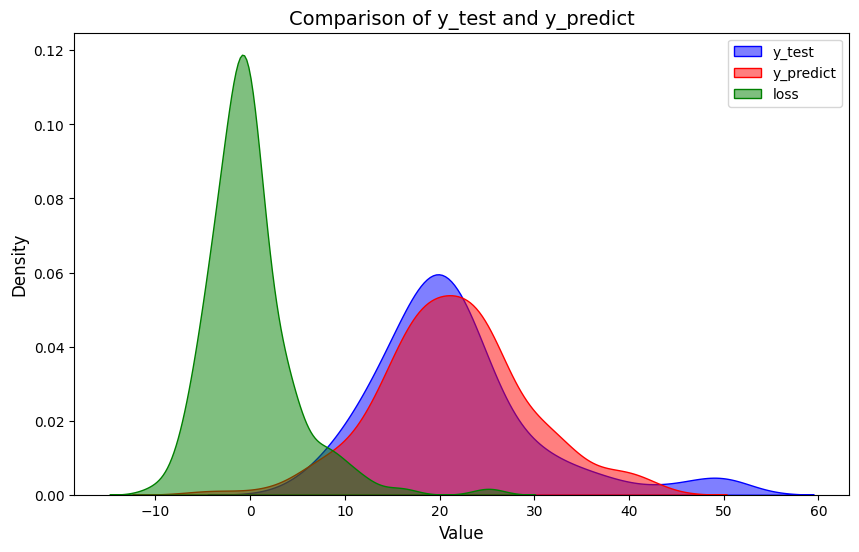

In [490]:
# Plot actual vs predicted values
plotting(sgd_best_model)

## Task 3: Model Evaluation – 15%

### Task 3.a.: Answer in your own words

a. 

MSE (Mean Squared Error) represents the sum of the squared differences between actual data and the expected data based on the model. In other words, MSE tells us how well the model fits the actual data by showing the extent of the errors between the predicted and real values.
On the other hand, R² is calculated using the formula: R² = 1 - MSE/Total Sum of Square, where TSS (Total Sum of Squares) is the sum of squared differences between the actual values and the mean of the dataset. 

In simpler terms, the higher the R², the better the model explains the variation of the target variable (y) based on the predictor variables (x). As R-squared approaches 1, the model is considered more accurate, and conversely, a lower R-squared indicates a poorer model fit.

b. 

MSE and R-squared differ in their focus: MSE explains the error between the model's predictions and the actual data, so a smaller MSE indicates a better model. In contrast, R-squared measures how well the model can explain the variance in the target variable. A higher R-squared means the model is better at explaining the variation in y, which typically corresponds to a lower MSE, and is considered more desirable.

c. 

Non-research students should care about MSE and R² because these metrics provide a clear picture of how well a model aligns with real-world data, reflecting its accuracy and reliability. Additionally, MSE and R² are essential in business intelligence, as they strengthen data analysis reports with measurable, evidence-backed insights.

### Task 3.b.: Evaluate your 3 trained models using the two methods above in code, and clearly  display the results

After reviewing the results, it can be concluded that all three models yield relatively similar performance. Specifically:

* R² in the range (0.69 – 0.74): This indicates that the models can explain approximately 70% of the variance in the target variable, meaning they have relatively good predictive performance.
* RMSE in the range (4 – 6): The average prediction error falling within this range shows that the difference between the actual values and the predicted values is within an acceptable margin.

## Part 5 Short Reflection & Clean Notebook – 10%

Throughout the project, I found that the most challenging part was selecting the right features to optimize the model's loss function. Initially, based on data analysis and plotting, I considered keeping only features with a correlation above 0.5 or below -0.5. However, when I removed the other features and compared the model's performance with all features, I realized that the difference in the average test results across the folds between the two choices wasn’t significant. Therefore, I decided to keep all the features, as I felt that the dataset size was small, and removing some features could potentially lead to missing out on spotting any useful weights if the dataset were to be expanded.

Another challenge I faced was getting familiar with the scikit-learn library and understanding how the parameters of different models work. At first, understanding and setting parameters like learning rate, epochs, and other algorithms made me feel a bit confused. However, after experimenting and reading more detailed documentation, I gradually became more comfortable and confident in using this library for my Machine Learning models.